# 科学技術計算6


## 非線形最適化

最小値
$$
\min_{\boldsymbol{x}} f(\boldsymbol{x})
$$

最適解
$$
\hat{\boldsymbol{x}} = \operatorname{argmin}_{\boldsymbol{x}} f(\boldsymbol{x})
$$

---
```bash
jupyter nbconvert sc6slide.ipynb --to slides --post serve
```

# scipyの関数

- 1次元用：`scipy.optimize.minimize_scalar()`
- 1次元・多次元用：`scipy.optimize.minimize()`
- 多次元用直線探索
  - `scipy.optimize.line_search()`

# 最急降下法（1次元）

各点で直線近似，勾配を下る方向へ移動

<table>
<tr><td>

初期値$x^{(0)}$，ステップサイズ$\alpha$
$$x^{(k+1)} = x^{(k)} - \alpha f'(x^{(k)})$$

</td>
<td>

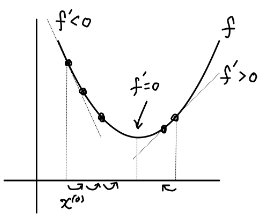

</td><tr>
</table>



# 最急降下法（多次元）

各点で（超）平面近似，勾配を下る方向へ移動

<table>
<tr>
<td>

初期値$\boldsymbol{x}^{(0)}$，ステップサイズ$\alpha$
$$\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} - \alpha \nabla f(\boldsymbol{x}^{(k)})$$

ここで
$\nabla f(\boldsymbol{x}^{(k)})$：勾配ベクトル

</td>
<td>

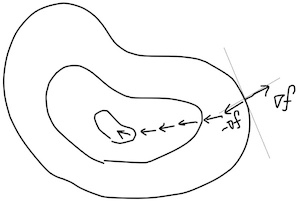

</td>
<tr>
</table>



# 最急降下法（多次元）＋直線探索

各点で（超）平面近似，勾配を下る方向へ下り切るまで移動

<table>
<tr>
<td>

初期値$\boldsymbol{x}^{(0)}$，ステップサイズ$\alpha$

1. $\boldsymbol{d}^{(k)} = - \nabla f(\boldsymbol{x}^{(k)})$
2. $\alpha^{(k)} = \operatorname{argmin}_\alpha f(\boldsymbol{x}^{(k)} + \alpha \boldsymbol{d}^{(k)})$
3. $\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \alpha^{(k)} \boldsymbol{d}^{(k)}$

</td>
<td>

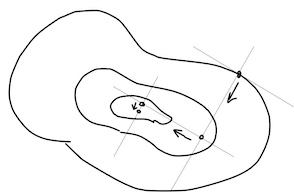

</td>
<tr>
</table>





# 1次の反復法の欠点

<table>
<tr>
<td>

- 目的関数の形状によっては，直線探索を併用しても反復回数が非常に多くなる
- 細長い場合（目的関数のヘッセ行列の条件数が大きい場合）
  - 勾配方向と実際に関数値が減少する方向が大きくずれる
  - $\rightarrow$ 2次微分の情報を利用するニュートン法

</td>
<td>

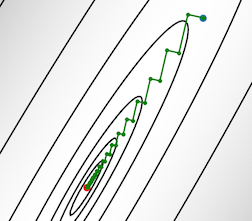

</td>
<tr>
</table>

# ニュートン法（1次元）

各点で2次関数近似，2次関数の最小値へ移動

<table>
<tr>
<td>

初期値$x^{(0)}$，ステップサイズ$\alpha$
$$x^{(k+1)} = x^{(k)} - \alpha \dfrac{f'(x^{(k)})}{f''(x^{(k)})}$$


</td>
<td>

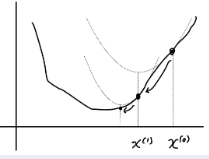

</td>
<tr>
</table>

# ニュートン法（1次元）の問題点

<table>
<tr>
<td>

- $f''(x) = 0$の場合には0除算が発生，更新不可
- $f''(x) < 0$の場合には
  - 分母が負になり更新方向が逆転
  - 極極大値に向かってしまう

修正ニュートン法：分母に$\lambda$を足して正にする
$$x^{(k+1)} = x^{(k)} - \alpha \dfrac{f'(x^{(k)})}{f''(x^{(k)}) + \lambda}$$

</td>
<td>

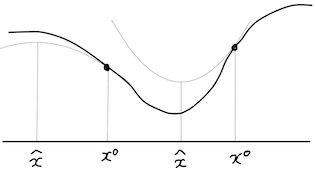

</td>
<tr>
</table>

# ニュートン法（2次元）

各点で2次関数（放物面）近似，放物面の最小値へ移動

<table>
<tr>
<td>

1. $\boldsymbol{d}^{(k)} = - H^{-1} \nabla f(\boldsymbol{x}^{(k)})$
    - $H \boldsymbol{d}^{(k)} = -\nabla f(\boldsymbol{x}^{(k)})$を解く
1. $\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \alpha \boldsymbol{d}^{(k)}$

$H$：ヘッセ行列

</td>
<td>

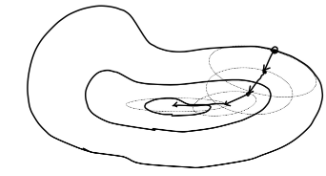

</td>
<tr>
</table>

# ニュートン法（2次元）の問題点

<table>
<tr>
<td>

- ヘッセ行列の時間・空間計算量が$O(n^2)$
  - 計算量が大きい $\rightarrow$ 準ニュートン法
- ヘッセ行列は正定値（$\boldsymbol{x}^T A \boldsymbol{x} > 0$）であるべき
  - 負定値（右図）だと極大値に向かってしまう $\rightarrow$ 修正ニュートン法

修正ニュートン法
1. $\boldsymbol{d}^{(k)} = - \left(H + \lambda I \right)^{-1} \nabla f(\boldsymbol{x}^{(k)})$
2. $\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \alpha^{(k)} \boldsymbol{d}^{(k)}$

</td>
<td>

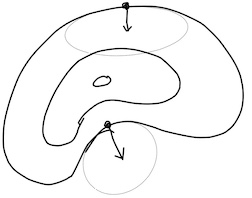

</td>
<tr>
</table>

# 準ニュートン法

ヘッセ行列やその逆行列の近似を逐次更新する

- **ヘッセ行列を更新**
   - 初期値$\boldsymbol{x}^{(0)}$，正定値対称の初期ヘッセ行列$B^{(0)}$, $k=0$
   - 収束するまで以下を反復
      1. $\boldsymbol{d}^{(k)} = - (B^{(k)})^{-1} \nabla f(\boldsymbol{x}^{(k)})$
         - $B^{(k)} \boldsymbol{d}^{(k)} = -\nabla f(\boldsymbol{x}^{(k)})$を解く
      2. $\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \alpha^{(k)} \boldsymbol{d}^{(k)}$
      3. $\boldsymbol{s}^{(k)} = \boldsymbol{x}^{(k+1)} - \boldsymbol{x}^{(k)}$：移動量
      4. $\boldsymbol{y}^{(k)} = \nabla f(\boldsymbol{x}^{(k+1)}) - \nabla f(\boldsymbol{x}^{(k)})$：勾配変化量
      5. $B^{(k)}, \boldsymbol{s}^{(k)}, \boldsymbol{y}^{(k)}$を用いて$B^{(k+1)}$を更新


# 準ニュートン法

ヘッセ行列やその逆行列の近似を逐次更新する

- **ヘッセ行列の逆行列を更新**
   - 初期値$\boldsymbol{x}^{(0)}$，正定値対称の初期ヘッセ逆行列$H^{(0)}$, $k=0$
   - 収束するまで以下を反復
      1. $\boldsymbol{d}^{(k)} = - H^{(k)} \nabla f(\boldsymbol{x}^{(k)})$
      2. $\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \alpha^{(k)} \boldsymbol{d}^{(k)}$
      3. $\boldsymbol{s}^{(k)} = \boldsymbol{x}^{(k+1)} - \boldsymbol{x}^{(k)}$：移動量
      4. $\boldsymbol{y}^{(k)} = \nabla f(\boldsymbol{x}^{(k+1)}) - \nabla f(\boldsymbol{x}^{(k)})$：勾配変化量
      5. $H^{(k)}, \boldsymbol{s}^{(k)}, \boldsymbol{y}^{(k)}$を用いて$H^{(k+1)}$を更新


# BFGS更新式

ヘッセ行列を更新する場合のBFGS公式

$$
B^{(k+1)}
=
B^{(k)}
+
\frac{\boldsymbol{y}^{(k)} \boldsymbol{y}^{(k)T}}{\boldsymbol{y}^{(k)T} \boldsymbol{s}^{(k)}}
-
\frac{B^{(k)} \boldsymbol{s}^{(k)} \boldsymbol{s}^{(k)T} B^{(k)T} }{\boldsymbol{s}^{(k)T} B^{(k)} \boldsymbol{s}^{(k)}}
$$


Limited-memory BFGS（L-BFGS）

- 保持した過去$m$回分の情報で$B$を更新する
  - ヘッセ近似行列全体を保持しない
  - メモリ使用量と計算量は$O(nm)$に削減される

